# A6 Presentación Intermedia de Base de Datos

Rodrigo Hernández Murrieta
A00827274

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%ls 

 00_00_binder.ipynb                            'Clase 2_Ejemplo 2.ipynb'
 00_00_primer_pasos.ipynb                       Clase3.ipynb
 01_01_data_types.ipynb                         Clase3PTEJ2.ipynb
 01_02_read_iloc_unique_groupby.ipynb           Clase4-Gráficass.ipynb
 02_00_data_wrangling.ipynb                    'Clase5-Gráficas de Linea.ipynb'
 02_01_null_display.ipynb                       coches.csv
 02_02_basic_math.ipynb                         cwurData.csv
'A2 Tipos de Variables.ipynb'                   data.csv
 A5.ipynb                                       datasets/
'A6-Presentación-A00827274 (2) (1) (2).ipynb'  'Football teams.csv'
'A6-Presentación-A00827274 (2) (1).ipynb'       headbrain.csv
 adult.csv                                      mic2.xlsx
 airline_data.csv                               mic.xlsx
 antropometria00.csv                            movies.csv
 antropometria-dataset-2.csv                    nhanes_2015_2016.csv
 antropometria-dataset.csv               

In [4]:
 %ls 'Football teams.csv'

'Football teams.csv'


In [5]:
path='Football teams.csv'
df= pd.read_csv(path) #función para leer archivos .csv y mostrarlos en la pantalla
df  

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86
...,...,...,...,...,...,...,...,...,...,...
93,Sheffield United,Premier League,20,8.5,73,3,43.0,76.9,19.1,6.46
94,Crotone,Serie A,45,9.5,85,4,47.2,80.4,12.7,6.43
95,Benevento,Serie A,40,11.0,90,5,44.2,77.7,13.4,6.43
96,Dijon,Ligue 1,25,9.2,75,5,46.9,80.0,14.3,6.42


In [6]:
df.columns

Index(['Team', 'Tournament', 'Goals', 'Shots pg', 'yellow_cards', 'red_cards',
       'Possession%', 'Pass%', 'AerialsWon', 'Rating'],
      dtype='object')

In [7]:
df.info() #PARA OBTENER INFORMACIÓN SOBRE LOS VALORES ALMACENADOS EN LAS COLUMNAS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          98 non-null     object 
 1   Tournament    98 non-null     object 
 2   Goals         98 non-null     int64  
 3   Shots pg      98 non-null     float64
 4   yellow_cards  98 non-null     int64  
 5   red_cards     98 non-null     int64  
 6   Possession%   98 non-null     float64
 7   Pass%         98 non-null     float64
 8   AerialsWon    98 non-null     float64
 9   Rating        98 non-null     float64
dtypes: float64(5), int64(3), object(2)
memory usage: 7.8+ KB


# Interpretación de la Base de Datos

# > Mis variables de interes son Tournament y Goals
La variable Tournament es de tipo str y la variable Goals es de tipo int
Mi pregunta de partida es:
¿En qué liga europea se marcaron más goles en la temporada 2020-2021?

In [8]:
my_pivot=pd.pivot_table(df,
                           index='Tournament',
                           values='Goals',
                           aggfunc='sum',
                          )
my_pivot

,Goals
Tournament,
Bundesliga,928
LaLiga,953
Ligue 1,1049
Premier League,1024
Serie A,1160


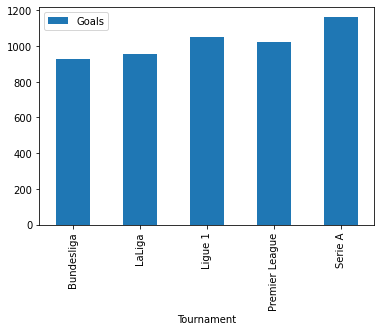

In [9]:
my_pivot.plot(kind ='bar')

# > Mis variables de interes son Pass% y Goals%
La variable Pass% es de tipo float y la variable Goals% es de tipo int
Mi pregunta de partida es:
Se parte de la hipótesis que a más pases generados en un partido, más goles se anotarán, ¿es cierto lo que se plantea ?

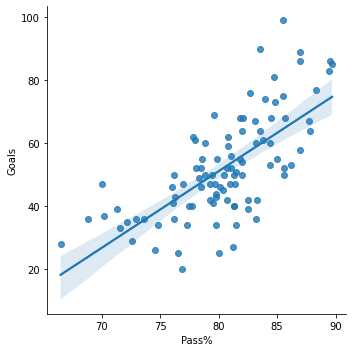

In [10]:
sns.lmplot (x='Pass%',
            y='Goals',
            data= df
           )

# Mis variables de interes son yellow_cards y red_cards
La variable yellow_cards es de tipo int y la variable red_cards es de tipo int
Mi hipótesis de partida es:
Mientras más amonestaciones hayan (tarjetas amarillas y tarjetas rojas) menos goles se marcaran por parte de los equipos de las ligas

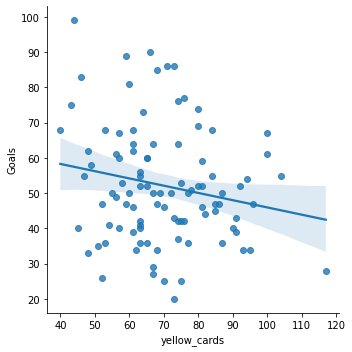

In [11]:
sns.lmplot (x='yellow_cards',
            y='Goals',
            data= df
           )

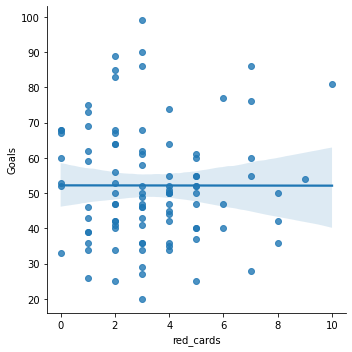

In [12]:
sns.lmplot (x='red_cards',
            y='Goals',
            data= df
           )

# Pregunta de Investigación: ¿Cúal fue el equipo que más goles marcó en la temporada 2020-2021?
La variable Goals es de tipo int

In [13]:
my_pivot=pd.pivot_table(df,
                           index='Team',
                           values='Goals',
                           aggfunc='sum',
                          )
my_pivot

,Goals
Team,
AC Milan,74
Angers,40
Arminia Bielefeld,26
Arsenal,55
Aston Villa,55
...,...
Werder Bremen,36
West Bromwich Albion,35
West Ham,62


In [14]:
my_pivot.columns

Index(['Goals'], dtype='object')

In [15]:
my_pivotTEN =my_pivot.sort_values(by =[( 'Goals')],
                           ascending = False, 
                           axis = 0)
my_pivotTEN

,Goals
Team,
Bayern Munich,99
Atalanta,90
Inter,89
Paris Saint-Germain,86
Napoli,86
...,...
Fulham,27
Arminia Bielefeld,26
Dijon,25


In [18]:
my_pivotTEN=my_pivotTEN.head(11)

In [19]:
my_pivotTEN

,Goals
Team,
Bayern Munich,99
Atalanta,90
Inter,89
Paris Saint-Germain,86
Napoli,86
Barcelona,85
Manchester City,83
Lyon,81
Juventus,77


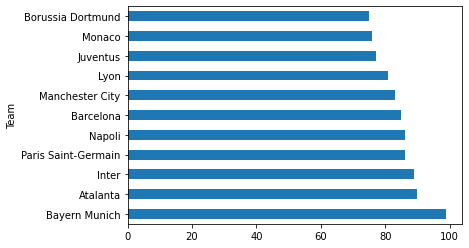

In [20]:
my_pivotTEN['Goals'].plot(kind='barh')